In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
 accuracy_score, precision_score, recall_score, f1_score,
 roc_auc_score, roc_curve, confusion_matrix, classification_report)
import seaborn as sns

In [73]:
data = load_breast_cancer()
X, y = data.data, data.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
 

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
y_pred_train = np.full(y_train.shape, np.mean(y_train))
y_pred_test = np.full(y_test.shape, np.mean(y_train))

In [77]:
n_estimators = 100
learning_rate = 0.1

In [78]:
for i in range(n_estimators):
 residuals = y_train-y_pred_train
    
 tree = DecisionTreeRegressor(max_depth=3, random_state=42)
 tree.fit(X_train, residuals)
    
 update = tree.predict(X_train)
 update_test = tree.predict(X_test)
    
 y_pred_train += learning_rate * update
 y_pred_test += learning_rate * update_test
    
 if (i + 1) % 10 == 0:
   loss = np.mean((y_train-y_pred_train) ** 2)
   print(f"Iteration {i+1}/{n_estimators}- Training Loss: {loss:.4f}")

Iteration 10/100- Training Loss: 0.0420
Iteration 20/100- Training Loss: 0.0132
Iteration 30/100- Training Loss: 0.0072
Iteration 40/100- Training Loss: 0.0044
Iteration 50/100- Training Loss: 0.0029
Iteration 60/100- Training Loss: 0.0023
Iteration 70/100- Training Loss: 0.0019
Iteration 80/100- Training Loss: 0.0015
Iteration 90/100- Training Loss: 0.0012
Iteration 100/100- Training Loss: 0.0010


In [79]:
update = tree.predict(X_train)
update_test = tree.predict(X_test)

In [80]:
y_pred_train += learning_rate * update
y_pred_test += learning_rate * update_test

In [81]:
if (i + 1) % 10 == 0:
 loss = np.mean((y_train-y_pred_train) ** 2)
 print(f"Iteration {i+1}/{n_estimators}- Training Loss: {loss:.4f}")

Iteration 100/100- Training Loss: 0.0010


In [82]:
y_pred_binary = (y_pred_test >= 0.5).astype(int)

In [83]:
acc = accuracy_score(y_test, y_pred_binary)
prec = precision_score(y_test, y_pred_binary)
rec = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_binary)

In [84]:
 print("\n=== Model Evaluation ===")
 print(f"Accuracy: {acc:.4f}")
 print(f"Precision: {prec:.4f}")
 print(f"Recall: {rec:.4f}")
 print(f"F1 Score: {f1:.4f}")
 print(f"ROC AUC: {roc_auc:.4f}")
 print("\nConfusion Matrix:\n", cm)
 print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))


=== Model Evaluation ===
Accuracy: 0.9386
Precision: 0.9452
Recall: 0.9583
F1 Score: 0.9517
ROC AUC: 0.9921

Confusion Matrix:
 [[38  4]
 [ 3 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



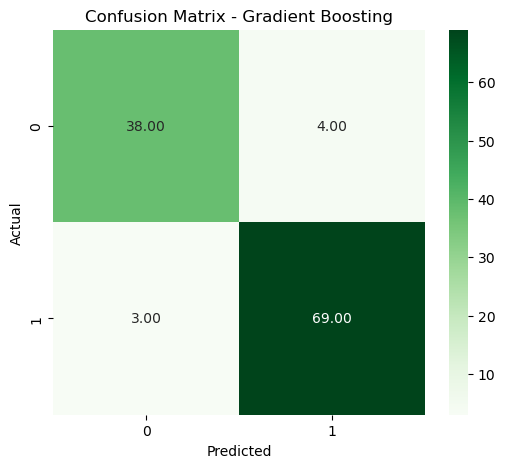

In [85]:
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
plt.title("Confusion Matrix - Gradient Boosting")
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

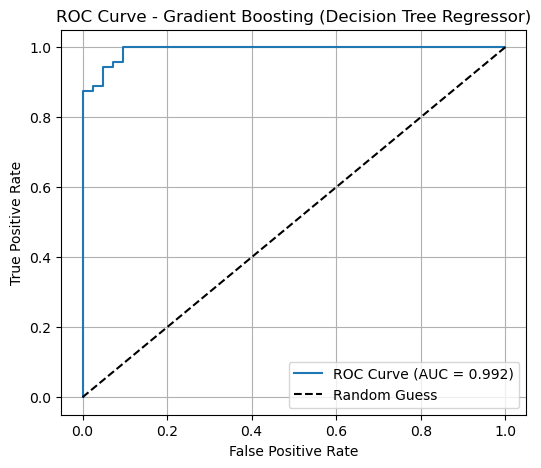

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting (Decision Tree Regressor)")
plt.legend()
plt.grid(True)
plt.show()